The first library we can try is CSV:

In [1]:
import csv

In [2]:
with open('survey_results_public.csv', newline='', encoding="utf8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count+= 1
        else:
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are Respondent, Hobby, OpenSource, Country, Student, Employment, FormalEducation, UndergradMajor, CompanySize, DevType, YearsCoding, YearsCodingProf, JobSatisfaction, CareerSatisfaction, HopeFiveYears, JobSearchStatus, LastNewJob, AssessJob1, AssessJob2, AssessJob3, AssessJob4, AssessJob5, AssessJob6, AssessJob7, AssessJob8, AssessJob9, AssessJob10, AssessBenefits1, AssessBenefits2, AssessBenefits3, AssessBenefits4, AssessBenefits5, AssessBenefits6, AssessBenefits7, AssessBenefits8, AssessBenefits9, AssessBenefits10, AssessBenefits11, JobContactPriorities1, JobContactPriorities2, JobContactPriorities3, JobContactPriorities4, JobContactPriorities5, JobEmailPriorities1, JobEmailPriorities2, JobEmailPriorities3, JobEmailPriorities4, JobEmailPriorities5, JobEmailPriorities6, JobEmailPriorities7, UpdateCV, Currency, Salary, SalaryType, ConvertedSalary, CurrencySymbol, CommunicationTools, TimeFullyProductive, EducationTypes, SelfTaughtTypes, TimeAfterBootcamp, HackathonReasons, 

It's pretty useful but doesn't provide easy manipulation of columns. Next, let us take a look at pandas dataframes:

In [3]:
import pandas as pd

Save the csv into a variable dataframe:

In [4]:
df=pd.read_csv("survey_results_public.csv", encoding ="utf8", low_memory=False)

Now we can query the dataframe by column numbers

In [5]:
df[df.columns[1]]

0        Yes
1        Yes
2        Yes
3         No
4        Yes
        ... 
98850    Yes
98851     No
98852    Yes
98853    Yes
98854    Yes
Name: Hobby, Length: 98855, dtype: object

Or we can utilize names:

In [6]:
df["Student"]

0                    No
1                    No
2                    No
3                    No
4        Yes, part-time
              ...      
98850               NaN
98851    Yes, full-time
98852    Yes, full-time
98853                No
98854               NaN
Name: Student, Length: 98855, dtype: object

Now, the data we need is: Parent's Education, Education, Reporting Responsibility, Employment, Reporting Code, and Salary.

In [7]:
new_df = df[['Respondent', 'FormalEducation', 'EthicalImplications', 'Employment', 'EthicsReport', 'ConvertedSalary']].copy()

And we can verify that our dataframe is correct (columns are split into mutiple lines of entries):

In [8]:
new_df

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
0,1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed part-time,"Yes, and publicly",NaN
1,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,Depends on what it is,70841.0
2,4,Associate degree,NaN,Employed full-time,NaN,NaN
3,5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,"Yes, but only within the company",NaN
4,7,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",21426.0
...,...,...,...,...,...,...
98850,101513,NaN,NaN,NaN,NaN,NaN
98851,101531,NaN,NaN,"Not employed, but looking for work",NaN,NaN
98852,101541,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Employed full-time,NaN,NaN
98853,101544,Some college/university study without earning ...,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN


Given this new table, we can now output to another csv which is purely for the columns we're interested in.

In [9]:
new_df.to_csv('survey_results_public_important.csv', index=False, encoding='utf-8')

# Now we need to clean up the data. Only use entries that have ALL the fields entered

In [10]:
cleaned_survey_results = new_df.copy().dropna()

In [11]:
cleaned_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
1,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,Depends on what it is,70841.0
4,7,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",21426.0
5,8,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Unsure / I don't know,Employed full-time,Depends on what it is,41671.0
6,9,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",120000.0
8,11,Some college/university study without earning ...,Yes,Employed full-time,"Yes, and publicly",250000.0
...,...,...,...,...,...,...
89932,99868,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,"Not employed, but looking for work","Yes, and publicly",97233.0
89946,100383,"Secondary school (e.g. American high school, G...",Unsure / I don't know,"Not employed, and not looking for work",Depends on what it is,0.0
89954,100743,"Secondary school (e.g. American high school, G...",Yes,"Not employed, and not looking for work",Depends on what it is,10284.0
89960,100927,"Secondary school (e.g. American high school, G...",Unsure / I don't know,Employed full-time,Depends on what it is,0.0


Well that was easy! I wasn't anticipating it to be such an easy command, but go Pandas!

# Now, let's quantify the responses of each column
Basically, I'll make a dictionary for each column

'EducationParents', 'FormalEducation', 'EthicalImplications', 'Employment', 'EthicsReport', 'ConvertedSalary'

In [12]:
quantified_survey_results = cleaned_survey_results.copy()

## FormalEducation

In [15]:
print(cleaned_survey_results['FormalEducation'].unique())

['Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)' 'Associate degree'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)' 'Primary/elementary school'
 'I never completed any formal education']


In [16]:
FormalEducation = {'Professional degree (JD, MD, etc.)': 8,
                    'Other doctoral degree (Ph.D, Ed.D., etc.)': 7,
                    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6,
                    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
                    'Associate degree': 4,
                    'They never completed any formal education': 3,
                    'I never completed any formal education': 3,
                    'Some college/university study without earning a degree': 2,
                    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
                    'Primary/elementary school': 0}
quantified_survey_results['FormalEducation'] = cleaned_survey_results['FormalEducation'].replace(FormalEducation)
print(quantified_survey_results['FormalEducation'].unique())

[5 2 1 6 4 8 7 0 3]


## EthicsImplications

In [17]:
print(cleaned_survey_results['EthicalImplications'].unique())

['Yes' "Unsure / I don't know" 'No']


In [18]:
# Note: Will the negative number affect our results too much?

EthicalImplications = {'Yes': 1, 
                        "Unsure / I don't know": 0,
                      "No": -1}

quantified_survey_results['EthicalImplications'] = cleaned_survey_results['EthicalImplications'].replace(EthicalImplications)
print(quantified_survey_results['Employment'].unique())

['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Not employed, but looking for work' 'Retired']


## Employment

In [19]:
# Note: This was the hardest one to quantify. Also I think we should ommit 'Retired' but I want to see what you all think

Employment = {"Employed full-time": 5,
                "Independent contractor, freelancer, or self-employed": 4,
              'Employed part-time': 3,
              'Not employed, but looking for work': 2,
              'Not employed, and not looking for work': 1,
              'Retired':0
}

quantified_survey_results['Employment'] = cleaned_survey_results['Employment'].replace(Employment)
print(quantified_survey_results['Employment'].unique())

[5 3 4 1 2 0]


## EthicsReport

In [20]:
quantified_survey_results = quantified_survey_results[quantified_survey_results.EthicsReport != 'Depends on what it is']

In [21]:
quantified_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
4,7,2,1,5,"Yes, but only within the company",21426.0
6,9,2,1,5,"Yes, but only within the company",120000.0
8,11,2,1,5,"Yes, and publicly",250000.0
14,21,1,1,5,"Yes, and publicly",0.0
17,27,6,1,5,"Yes, and publicly",47904.0
...,...,...,...,...,...,...
89898,98419,5,0,3,"Yes, and publicly",4548.0
89913,98833,8,1,2,"Yes, and publicly",25788.0
89922,99355,1,1,1,"Yes, but only within the company",0.0
89925,99477,1,0,1,"Yes, and publicly",0.0


In [22]:
Report = {"Yes, but only within the company":1, 
          "Yes, and publicly":1, 
          "No":0
         }

quantified_survey_results['EthicsReport'] = quantified_survey_results['EthicsReport'].replace(Report)

In [23]:
quantified_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
4,7,2,1,5,1,21426.0
6,9,2,1,5,1,120000.0
8,11,2,1,5,1,250000.0
14,21,1,1,5,1,0.0
17,27,6,1,5,1,47904.0
...,...,...,...,...,...,...
89898,98419,5,0,3,1,4548.0
89913,98833,8,1,2,1,25788.0
89922,99355,1,1,1,1,0.0
89925,99477,1,0,1,1,0.0


## ConvertedSalary

In [24]:
print(quantified_survey_results['ConvertedSalary'].unique())

[ 21426. 120000. 250000. ...    400.   1050.   1584.]


In [25]:
# quantified_survey_results.to_csv('quantified.csv', index=False, encoding='utf-8')

In [26]:
quantified_survey_results['ConvertedSalary'].max()

2000000.0

In [27]:
quantified_survey_results['ConvertedSalary'].min()

0.0

In [28]:
salary_bins = [0, 10000,40000,80000,160000,200000,500000,2000000]

In [29]:
quantified_survey_results['ConvertedSalary'] = pd.cut(x=quantified_survey_results['ConvertedSalary'], bins = salary_bins, include_lowest=True, labels=[0,1,2,3,4,5,6])

In [30]:
quantified_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
4,7,2,1,5,1,1
6,9,2,1,5,1,3
8,11,2,1,5,1,5
14,21,1,1,5,1,0
17,27,6,1,5,1,2
...,...,...,...,...,...,...
89898,98419,5,0,3,1,0
89913,98833,8,1,2,1,1
89922,99355,1,1,1,1,0
89925,99477,1,0,1,1,0


# Histograms

In [31]:
def make_histogram(column_name, num_bins=False):
    if not num_bins:
        num_bins = len(quantified_survey_results[column_name].unique())
    hist = quantified_survey_results[column_name].hist(bins=num_bins, )
    hist.set_title(column_name)
    return hist

In [32]:
#make_histogram('EducationParents')

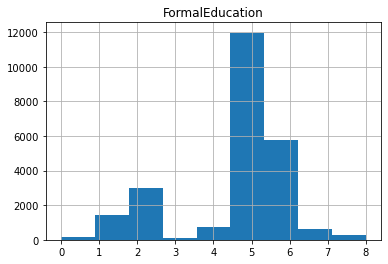

In [33]:
make_histogram('FormalEducation')

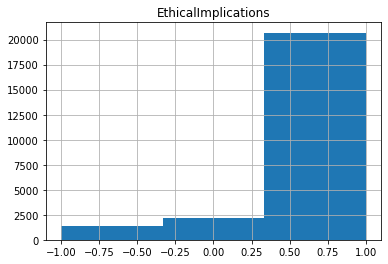

In [34]:
make_histogram('EthicalImplications')

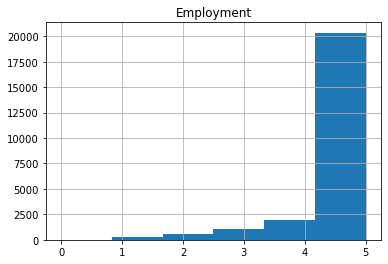

In [35]:
make_histogram('Employment')

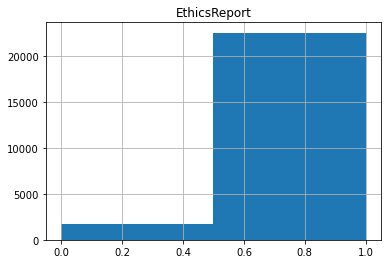

In [36]:
make_histogram('EthicsReport')

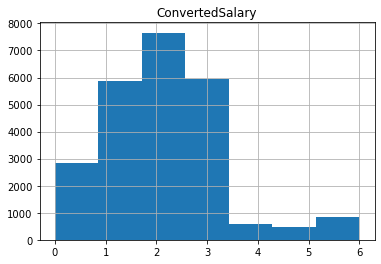

In [37]:
make_histogram('ConvertedSalary')

# Get the results of a specific row

In [38]:

quantified_survey_results.iloc[0]

Respondent             7
FormalEducation        2
EthicalImplications    1
Employment             5
EthicsReport           1
ConvertedSalary        1
Name: 4, dtype: object

# Stratifying

In [39]:
stratified = quantified_survey_results.copy()
stratified = stratified.drop(columns=["Respondent"])
stratified = stratified.groupby(['FormalEducation', 'EthicalImplications'])

## Here is the mean of each strata

In [40]:
stratified.mean()

Employment  EthicsReport
FormalEducation EthicalImplications                          
0               -1                     3.437500      0.437500
                 0                     2.857143      0.809524
                 1                     3.618056      0.923611
1               -1                     3.968000      0.584000
                 0                     3.950355      0.822695
                 1                     4.069456      0.948954
2               -1                     4.491620      0.603352
                 0                     4.536170      0.825532
                 1                     4.597697      0.960461
3               -1                     3.875000      1.000000
                 0                     3.750000      0.833333
                 1                     4.324324      0.945946
4               -1                     4.837209      0.674419
                 0                     4.633333      0.816667
                 1                     4.671254      0.952599
5               -1                     4.709677      0.683871
                 0                     4.758422      0.875842
                 1                     4.804613      0.957259
6               -1                     4.796178      0.707006
                 0                     4.831633      0.846939
                 1                     4.797458      0.954490
7               -1                     4.923077      0.461538
                 0                     4.735294      0.882353
                 1                     4.833333      0.965636
8               -1                     4.869565      0.608696
                 0                     4.883721      0.883721
                 1                     4.680672      0.894958

### Histagram are easy. Here's a histogram of the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DD37F30>,
      dtype=object)

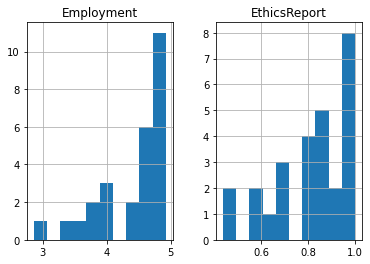

In [41]:
stratified.mean().hist()

In [42]:
# stratified.mean().to_csv('stratified_mean.csv', index=True, encoding='utf-8')

## Mean isn't the only thing we can do. We can also get a specific stata

In [43]:
stratified.get_group((1, 1))
# stratified.mean()

,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
14,1,1,5,1,0
160,1,1,3,1,2
244,1,1,5,1,2
495,1,1,3,1,0
563,1,1,3,1,1
...,...,...,...,...,...
89806,1,1,0,0,1
89816,1,1,2,1,0
89820,1,1,2,1,0
89888,1,1,4,0,0


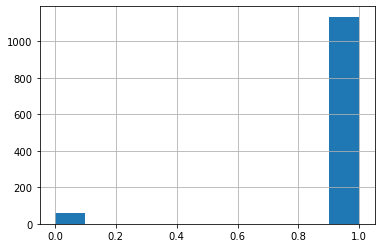

In [44]:
stratified.get_group((1, 1))['EthicsReport'].hist()

In [45]:
len(stratified)

27

# Probability

Now we can define a function which will be able to tell us the probability for a certain event string, given a conditional string. An example of the notation is as follows: 
$$p(x=2|y=3, v=1) = probability(\text{"x == 2"}, \text{"y == 3 and v == 1"})$$

In [46]:
def probability (event_string, conditional_string):
    #note this will go off the quantified_survey_results
    data = quantified_survey_results.copy()
    
    if conditional_string:
        conditioned_data = data.query(conditional_string)
    else:
        conditioned_data = data
    event_given_conditioned_data = conditioned_data.query(event_string)
    
    return len(event_given_conditioned_data) / len(conditioned_data) if len(conditioned_data) != 0 else 0

A couple sample examples can be found below where we condition on an event, and when we do not:

In [47]:
probability('Employment == 5', 'FormalEducation == 1 and EthicalImplications == 1')

0.5765690376569038

In [48]:
probability('EthicsReport == 1', '')

0.9303737352880446

In [49]:
def prob_over_covariates(Y,Z,A):
    #Define our constants:
    education_range = [0,1,2,3,4,5,6,7]
    ethics_range = [-1,0,1]
    
    cum_sum = 0
    #Run through all levels and calculate the risk within each level of employment
    for edu in education_range:
        for eth in ethics_range:
            
            val1 = probability("ConvertedSalary == " + str(Y), "FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth) + " and EthicsReport == " + str(A) + " and Employment == " + str(Z))
            val2 = probability("FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth), "")
            
            cum_sum += val1 * val2
    return cum_sum

In [50]:
def standardization(Y):
    #Define our constants:
    employment_range = [0,1,2,3,4,5]
    
    #Standardized treated risk
    treated_sum = 0
    for emp in employment_range:
        treated_sum += prob_over_covariates(Y, emp, 1) * probability("Employment == " + str(emp),"")
        
    #Standardized untreated risk
    untreated_sum = 0
    for emp in employment_range:
        untreated_sum += prob_over_covariates(Y, emp, 0) * probability("Employment == " + str(emp),"")
    
    return (untreated_sum, treated_sum)

We can now run through every salary range and compare all of the different treated + untreated risk values.

In [51]:
salary_range = [0,1,2,3,4,5,6]
salary_bins = [10000,40000,80000,160000,200000,500000,2000000]
tuple_list = []
for sal in salary_range:
    tuple_list.append(standardization(sal))
print(tuple_list)

[(0.19004091728584213, 0.10645632045548083), (0.35474502001265457, 0.235315342075257), (0.22731040326173366, 0.3185701029601804), (0.15166359944071228, 0.2487616376035318), (0.011499525678184085, 0.024167861842089494), (0.01303829367984179, 0.0200190380744335), (0.034435257025118085, 0.033394953289387734)]


And now see which values map to which:

In [52]:
for sal in salary_range:
    print("Risk of salary of " + str(salary_bins[sal]) + " if (doesn't report, reports) code: " + str(tuple_list[sal]))

Risk of salary of 10000 if (doesn't report, reports) code: (0.19004091728584213, 0.10645632045548083)
Risk of salary of 40000 if (doesn't report, reports) code: (0.35474502001265457, 0.235315342075257)
Risk of salary of 80000 if (doesn't report, reports) code: (0.22731040326173366, 0.3185701029601804)
Risk of salary of 160000 if (doesn't report, reports) code: (0.15166359944071228, 0.2487616376035318)
Risk of salary of 200000 if (doesn't report, reports) code: (0.011499525678184085, 0.024167861842089494)
Risk of salary of 500000 if (doesn't report, reports) code: (0.01303829367984179, 0.0200190380744335)
Risk of salary of 2000000 if (doesn't report, reports) code: (0.034435257025118085, 0.033394953289387734)


Now we can also compute our risk values. Let's start with our Risk Difference:

In [53]:
for sal in salary_range:
    untreated, treated = tuple_list[sal]
    print("Risk ratio for salary of " + str(salary_bins[sal]) + ": " + str(treated - untreated))

Risk ratio for salary of 10000: -0.0835845968303613
Risk ratio for salary of 40000: -0.11942967793739756
Risk ratio for salary of 80000: 0.09125969969844674
Risk ratio for salary of 160000: 0.0970980381628195
Risk ratio for salary of 200000: 0.012668336163905409
Risk ratio for salary of 500000: 0.0069807443945917105
Risk ratio for salary of 2000000: -0.001040303735730351


Similarly, we can then compute the Risk Ratio:

In [54]:
salary_range = [0,1,2,3,4,5,6]
salary_bins = [10000,40000,80000,160000,200000,500000,2000000]
for sal in salary_range:
    untreated, treated = tuple_list[sal]
    print("Risk ratio for salary of " + str(salary_bins[sal]) + ": " + str(treated/untreated))

Risk ratio for salary of 10000: 0.5601757872772156
Risk ratio for salary of 40000: 0.6633365623197833
Risk ratio for salary of 80000: 1.4014761242289775
Risk ratio for salary of 160000: 1.6402197924939574
Risk ratio for salary of 200000: 2.1016398865858172
Risk ratio for salary of 500000: 1.5354032180901462
Risk ratio for salary of 2000000: 0.9697895754060577


#### Scratch work:

In [55]:
print(cleaned_survey_results['EthicsReport'].unique())

['Depends on what it is' 'Yes, but only within the company'
 'Yes, and publicly' 'No']


In [56]:
EthicsReport = {'Yes, and publicly': 3,
                'Yes, but only within the company': 2,
                'Depends on what it is': 1,
                'No': 0 
}

quantified_survey_results['EthicsReport'] = cleaned_survey_results['EthicsReport'].replace(EthicsReport)
print(quantified_survey_results['EthicsReport'].unique())

[2 3 0]
